In [1]:
import os
import shutil

import numpy as np
import nibabel as nib

import matplotlib.pyplot as plt
from PIL import Image

from acyclic_directed_graph.confidence_with_dg import confidence_map as acyclic_cm
from karamalis_confidence_map.confidence_monai import UltrasoundConfidenceMap as karamalis_cm

In [2]:
cm_paths_liver = {
    "all": "data/CMS/cms_all_liver.nii.gz",
    "mid": "data/CMS/cms_mid_liver.nii.gz",
    "min": "data/CMS/cms_min_liver.nii.gz",
    "ultranerf": "data/CMS/cms_ultranerf_liver.nii.gz",
    "acyclic": "data/CMS/cms_acyclic_liver.nii.gz",
}

cm_paths_spine = {
    "all": "data/CMS/cms_all_spine.nii.gz",
    "mid": "data/CMS/cms_mid_spine.nii.gz",
    "min": "data/CMS/cms_min_spine.nii.gz",
    "ultranerf": "data/CMS/cms_ultranerf_spine.nii.gz",
    "acyclic": "data/CMS/cms_acyclic_spine.nii.gz",
}

# Load the confidence maps

cms_liver = { k: nib.load(v).get_fdata() for k, v in cm_paths_liver.items() }
cms_spine = { k: nib.load(v).get_fdata() for k, v in cm_paths_spine.items() }

In [3]:
images_liver = nib.load("data/images_liver.nii.gz").get_fdata()
images_spine = nib.load("data/images_spine.nii.gz").get_fdata()

In [4]:
# Print shapes of everything

print(f"Shape of liver images: {images_liver.shape}")
print(f"Shape of spine images: {images_spine.shape}")

for k, v in cms_liver.items():
    print(f"Shape of liver {k} confidence map: {v.shape}")

for k, v in cms_spine.items():
    print(f"Shape of spine {k} confidence map: {v.shape}")

Shape of liver images: (200, 512, 256)
Shape of spine images: (152, 1300, 164)
Shape of liver all confidence map: (200, 512, 256)
Shape of liver mid confidence map: (200, 512, 256)
Shape of liver min confidence map: (200, 512, 256)
Shape of liver ultranerf confidence map: (200, 512, 256)
Shape of liver acyclic confidence map: (200, 512, 256)
Shape of spine all confidence map: (152, 1300, 164)
Shape of spine mid confidence map: (152, 1300, 164)
Shape of spine min confidence map: (152, 1300, 164)
Shape of spine ultranerf confidence map: (152, 1300, 164)
Shape of spine acyclic confidence map: (152, 1300, 164)


In [5]:
def crop_from_bottom(arr, ratio):
    """ Ratio is the ratio of the image to crop from the bottom.
    """
    h = int(arr.shape[1] * (1 - ratio))
    return arr[:, :h, :]

In [6]:
# Create cropped versions of the images

images_liver_cropped = crop_from_bottom(images_liver, 1/3)
images_spine_cropped = crop_from_bottom(images_spine, 1/3)

# Create cropped versions of the confidence maps

cms_liver_cropped = { k: crop_from_bottom(v, 1/3) for k, v in cms_liver.items() }
cms_spine_cropped = { k: crop_from_bottom(v, 1/3) for k, v in cms_spine.items() }

# Print shapes of everything

print(f"Shape of liver images: {images_liver_cropped.shape}")
print(f"Shape of spine images: {images_spine_cropped.shape}")

for k, v in cms_liver_cropped.items():
    print(f"Shape of liver {k} confidence map: {v.shape}")

for k, v in cms_spine_cropped.items():
    print(f"Shape of spine {k} confidence map: {v.shape}")

Shape of liver images: (200, 341, 256)
Shape of spine images: (152, 866, 164)
Shape of liver all confidence map: (200, 341, 256)
Shape of liver mid confidence map: (200, 341, 256)
Shape of liver min confidence map: (200, 341, 256)
Shape of liver ultranerf confidence map: (200, 341, 256)
Shape of liver acyclic confidence map: (200, 341, 256)
Shape of spine all confidence map: (152, 866, 164)
Shape of spine mid confidence map: (152, 866, 164)
Shape of spine min confidence map: (152, 866, 164)
Shape of spine ultranerf confidence map: (152, 866, 164)
Shape of spine acyclic confidence map: (152, 866, 164)


In [7]:
# Select random subset of slices for numeric evaluation

n = 10 # Number of slices to select

# Liver

idxs_liver = np.random.choice(images_liver.shape[0], n, replace=False)
idxs_liver.sort()

# Spine

idxs_spine = np.random.choice(images_spine.shape[0], n, replace=False)
idxs_spine.sort()

In [8]:
# Create arrays for selected slices from each array

images_liver_selected = images_liver[idxs_liver]
images_spine_selected = images_spine[idxs_spine]

cms_liver_selected = { k: v[idxs_liver] for k, v in cms_liver.items() }
cms_spine_selected = { k: v[idxs_spine] for k, v in cms_spine.items() }

images_liver_cropped_selected = images_liver_cropped[idxs_liver]
images_spine_cropped_selected = images_spine_cropped[idxs_spine]

cms_liver_cropped_selected = { k: v[idxs_liver] for k, v in cms_liver_cropped.items() }
cms_spine_cropped_selected = { k: v[idxs_spine] for k, v in cms_spine_cropped.items() }

In [9]:
# Print shapes of everything

print(f"Shape of liver images: {images_liver_selected.shape}")
print(f"Shape of spine images: {images_spine_selected.shape}")

for k, v in cms_liver_selected.items():
    print(f"Shape of liver {k} confidence map: {v.shape}")

for k, v in cms_spine_selected.items():
    print(f"Shape of spine {k} confidence map: {v.shape}")

print(f"Shape of liver images: {images_liver_cropped_selected.shape}")
print(f"Shape of spine images: {images_spine_cropped_selected.shape}")

for k, v in cms_liver_cropped_selected.items():
    print(f"Shape of liver {k} confidence map: {v.shape}")

for k, v in cms_spine_cropped_selected.items():
    print(f"Shape of spine {k} confidence map: {v.shape}")


Shape of liver images: (10, 512, 256)
Shape of spine images: (10, 1300, 164)
Shape of liver all confidence map: (10, 512, 256)
Shape of liver mid confidence map: (10, 512, 256)
Shape of liver min confidence map: (10, 512, 256)
Shape of liver ultranerf confidence map: (10, 512, 256)
Shape of liver acyclic confidence map: (10, 512, 256)
Shape of spine all confidence map: (10, 1300, 164)
Shape of spine mid confidence map: (10, 1300, 164)
Shape of spine min confidence map: (10, 1300, 164)
Shape of spine ultranerf confidence map: (10, 1300, 164)
Shape of spine acyclic confidence map: (10, 1300, 164)
Shape of liver images: (10, 341, 256)
Shape of spine images: (10, 866, 164)
Shape of liver all confidence map: (10, 341, 256)
Shape of liver mid confidence map: (10, 341, 256)
Shape of liver min confidence map: (10, 341, 256)
Shape of liver ultranerf confidence map: (10, 341, 256)
Shape of liver acyclic confidence map: (10, 341, 256)
Shape of spine all confidence map: (10, 866, 164)
Shape of spi

In [10]:
def confidence_map_on_3d(arr, cm):
    res = []
    for i in range(arr.shape[0]):
        res.append(cm(arr[i]))
    return np.stack(res)

In [11]:
# Calculate Karamalis confidence maps on images and cropped images

cm_all = karamalis_cm(sink_mode="all", solve_mode="octave")
cm_mid = karamalis_cm(sink_mode="mid", solve_mode="octave")
cm_min = karamalis_cm(sink_mode="min", solve_mode="octave")


In [12]:
# Liver

liver_all = confidence_map_on_3d(images_liver_selected, cm_all)
liver_mid = confidence_map_on_3d(images_liver_selected, cm_mid)
liver_min = confidence_map_on_3d(images_liver_selected, cm_min)

# liver_all_cropped = confidence_map_on_3d(images_liver_cropped_selected, cm_all)
# liver_mid_cropped = confidence_map_on_3d(images_liver_cropped_selected, cm_mid)
# liver_min_cropped = confidence_map_on_3d(images_liver_cropped_selected, cm_min)

In [ ]:
# Spine

spine_all = confidence_map_on_3d(images_spine_selected, cm_all)
spine_mid = confidence_map_on_3d(images_spine_selected, cm_mid)
spine_min = confidence_map_on_3d(images_spine_selected, cm_min)

spine_all_cropped = confidence_map_on_3d(images_spine_cropped_selected, cm_all)
spine_mid_cropped = confidence_map_on_3d(images_spine_cropped_selected, cm_mid)
spine_min_cropped = confidence_map_on_3d(images_spine_cropped_selected, cm_min)

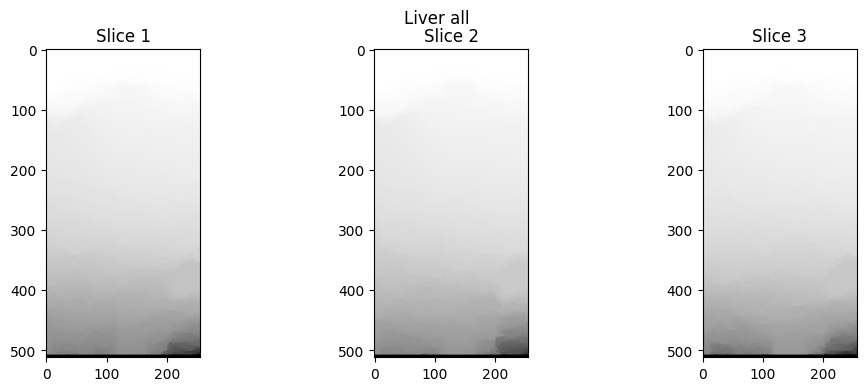

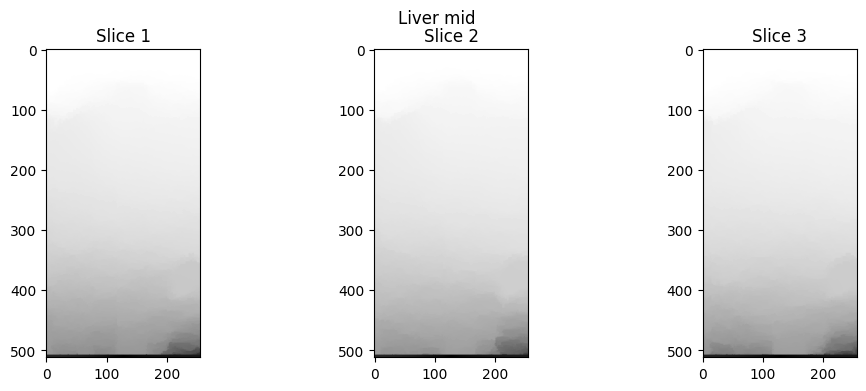

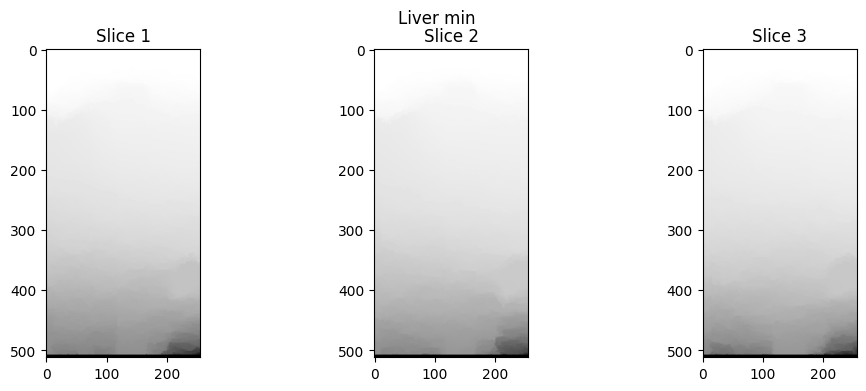

In [13]:
# Plot the first slice from each confidence map

def plot_confidence_map(arr, title):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(arr[0], cmap="gray")
    axs[1].imshow(arr[1], cmap="gray")
    axs[2].imshow(arr[2], cmap="gray")
    axs[0].set_title("Slice 1")
    axs[1].set_title("Slice 2")
    axs[2].set_title("Slice 3")
    fig.suptitle(title)
    plt.show()

# Liver
    
plot_confidence_map(liver_all, "Liver all")
plot_confidence_map(liver_mid, "Liver mid")
plot_confidence_map(liver_min, "Liver min")

# plot_confidence_map(liver_all_cropped, "Liver all cropped")
# plot_confidence_map(liver_mid_cropped, "Liver mid cropped")
# plot_confidence_map(liver_min_cropped, "Liver min cropped")

# Spine

# plot_confidence_map(spine_all, "Spine all")
# plot_confidence_map(spine_mid, "Spine mid")
# plot_confidence_map(spine_min, "Spine min")

# plot_confidence_map(spine_all_cropped, "Spine all cropped")
# plot_confidence_map(spine_mid_cropped, "Spine mid cropped")
# plot_confidence_map(spine_min_cropped, "Spine min cropped")

In [14]:
# Calculate Acyclic confidence maps on images and cropped images

# Liver

liver_acyclic = confidence_map_on_3d(images_liver_selected, acyclic_cm)
# liver_acyclic_cropped = confidence_map_on_3d(images_liver_cropped_selected, acyclic_cm)

c:\Users\Bugra\Desktop\masters-thesis\acyclic_directed_graph\EdgeHistogramSRAD.py:159: FutureWarning: `multichannel` is a deprecated argument name for `pyramid_laplacian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  pyramid = tuple(pyramid_laplacian(sitk.GetArrayFromImage(exp_image), max_layer=3, downscale=2, multichannel=False))
c:\Users\Bugra\Desktop\masters-thesis\acyclic_directed_graph\EdgeHistogramSRAD.py:163: FutureWarning: `multichannel` is a deprecated argument name for `pyramid_expand`. It will be removed in version 1.0. Please use `channel_axis` instead.
  edge = sitk.GetImageFromArray(pyramid_expand(edge, upscale=2 ** 3, multichannel=False))


In [ ]:
# Spine

spine_acyclic = confidence_map_on_3d(images_spine_selected, acyclic_cm)
spine_acyclic_cropped = confidence_map_on_3d(images_spine_cropped_selected, acyclic_cm)

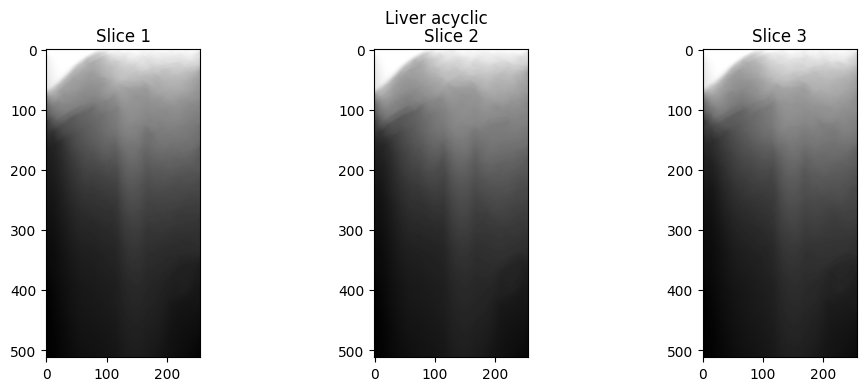

In [15]:
# Plot the first slice from each confidence map

# Liver

plot_confidence_map(liver_acyclic, "Liver acyclic")
# plot_confidence_map(liver_acyclic_cropped, "Liver acyclic cropped")

# Spine

# plot_confidence_map(spine_acyclic, "Spine acyclic")
# plot_confidence_map(spine_acyclic_cropped, "Spine acyclic cropped")

In [16]:
# Load cropped ultraNeRF confidence maps

liver_ultranerf_cropped = nib.load("cms_ultranerf_liver_partial.nii.gz").get_fdata()
spine_ultranerf_cropped = nib.load("cms_ultranerf_spine_partial.nii.gz").get_fdata()

# Select same slices for ultraNeRF confidence maps

# Liver

liver_ultranerf = cms_liver_selected["ultranerf"]
liver_ultranerf_cropped = liver_ultranerf_cropped[idxs_liver]

# Spine

spine_ultranerf = cms_spine_selected["ultranerf"]
spine_ultranerf_cropped = spine_ultranerf_cropped[idxs_spine]

# Print shapes of everything

print(f"Shape of liver images: {images_liver_selected.shape}")
print(f"Shape of spine images: {images_spine_selected.shape}")

print(f"Shape of liver ultraNeRF confidence map: {liver_ultranerf.shape}")
print(f"Shape of spine ultraNeRF confidence map: {spine_ultranerf.shape}")


Shape of liver images: (10, 512, 256)
Shape of spine images: (10, 1300, 164)
Shape of liver ultraNeRF confidence map: (10, 512, 256)
Shape of spine ultraNeRF confidence map: (10, 1300, 164)


In [ ]:
# Summary of everything

# Liver
# 3D images: images_liver_selected
# 3D confidence maps: cms_liver_selected
# 3D cropped images: images_liver_cropped_selected
# 3D cropped confidence maps: cms_liver_cropped_selected
# 2D confidence maps: liver_all, liver_mid, liver_min
# 2D cropped confidence maps: liver_all_cropped, liver_mid_cropped, liver_min_cropped
# 2D acyclic confidence map: liver_acyclic
# 2D cropped acyclic confidence map: liver_acyclic_cropped
# 2D ultraNeRF confidence map: liver_ultranerf
# 2D cropped ultraNeRF confidence map: liver_ultranerf_cropped

In [ ]:
# Save selected images and cropped images

experiment_dir = "experiments/17012024"
os.makedirs(experiment_dir, exist_ok=True)

# Liver

np.save(os.path.join(experiment_dir, "images_liver_selected.npy"), images_liver_selected)
np.save(os.path.join(experiment_dir, "images_liver_cropped_selected.npy"), images_liver_cropped_selected)

# Spine

np.save(os.path.join(experiment_dir, "images_spine_selected.npy"), images_spine_selected)
np.save(os.path.join(experiment_dir, "images_spine_cropped_selected.npy"), images_spine_cropped_selected)


In [ ]:
# Save full and cropped confidence maps

# Liver

# Karamalis all
np.save(os.path.join(experiment_dir, "liver_all.npy"), liver_all)
np.save(os.path.join(experiment_dir, "liver_all_cropped.npy"), liver_all_cropped)

# Karamalis mid
np.save(os.path.join(experiment_dir, "liver_mid.npy"), liver_mid)
np.save(os.path.join(experiment_dir, "liver_mid_cropped.npy"), liver_mid_cropped)

# Karamalis min
np.save(os.path.join(experiment_dir, "liver_min.npy"), liver_min)
np.save(os.path.join(experiment_dir, "liver_min_cropped.npy"), liver_min_cropped)

# Acyclic
np.save(os.path.join(experiment_dir, "liver_acyclic.npy"), liver_acyclic)
np.save(os.path.join(experiment_dir, "liver_acyclic_cropped.npy"), liver_acyclic_cropped)

# ultraNeRF
np.save(os.path.join(experiment_dir, "liver_ultranerf.npy"), liver_ultranerf)
np.save(os.path.join(experiment_dir, "liver_ultranerf_cropped.npy"), liver_ultranerf_cropped)

# Spine

# Karamalis all
np.save(os.path.join(experiment_dir, "spine_all.npy"), spine_all)
np.save(os.path.join(experiment_dir, "spine_all_cropped.npy"), spine_all_cropped)

# Karamalis mid
np.save(os.path.join(experiment_dir, "spine_mid.npy"), spine_mid)
np.save(os.path.join(experiment_dir, "spine_mid_cropped.npy"), spine_mid_cropped)

# Karamalis min
np.save(os.path.join(experiment_dir, "spine_min.npy"), spine_min)
np.save(os.path.join(experiment_dir, "spine_min_cropped.npy"), spine_min_cropped)

# Acyclic
np.save(os.path.join(experiment_dir, "spine_acyclic.npy"), spine_acyclic)
np.save(os.path.join(experiment_dir, "spine_acyclic_cropped.npy"), spine_acyclic_cropped)

# ultraNeRF
np.save(os.path.join(experiment_dir, "spine_ultranerf.npy"), spine_ultranerf)
np.save(os.path.join(experiment_dir, "spine_ultranerf_cropped.npy"), spine_ultranerf_cropped)

In [23]:
# Load confidence maps into dictionaries

experiment_dir = "experiments/17012024"

# Liver
liver = {
    "all": np.load(os.path.join(experiment_dir, "liver_all.npy")),
    "mid": np.load(os.path.join(experiment_dir, "liver_mid.npy")),
    "min": np.load(os.path.join(experiment_dir, "liver_min.npy")),
    "acyclic": np.load(os.path.join(experiment_dir, "liver_acyclic.npy")),
    "ultranerf": np.load(os.path.join(experiment_dir, "liver_ultranerf.npy")),
}

liver_cropped = {
    "all": np.load(os.path.join(experiment_dir, "liver_all_cropped.npy")),
    "mid": np.load(os.path.join(experiment_dir, "liver_mid_cropped.npy")),
    "min": np.load(os.path.join(experiment_dir, "liver_min_cropped.npy")),
    "acyclic": np.load(os.path.join(experiment_dir, "liver_acyclic_cropped.npy")),
    "ultranerf": np.load(os.path.join(experiment_dir, "liver_ultranerf_cropped.npy")),
}

# Spine

spine = {
    "all": np.load(os.path.join(experiment_dir, "spine_all.npy")),
    "mid": np.load(os.path.join(experiment_dir, "spine_mid.npy")),
    "min": np.load(os.path.join(experiment_dir, "spine_min.npy")),
    "acyclic": np.load(os.path.join(experiment_dir, "spine_acyclic.npy")),
    "ultranerf": np.load(os.path.join(experiment_dir, "spine_ultranerf.npy")),
}

spine_cropped = {
    "all": np.load(os.path.join(experiment_dir, "spine_all_cropped.npy")),
    "mid": np.load(os.path.join(experiment_dir, "spine_mid_cropped.npy")),
    "min": np.load(os.path.join(experiment_dir, "spine_min_cropped.npy")),
    "acyclic": np.load(os.path.join(experiment_dir, "spine_acyclic_cropped.npy")),
    "ultranerf": np.load(os.path.join(experiment_dir, "spine_ultranerf_cropped.npy")),
}

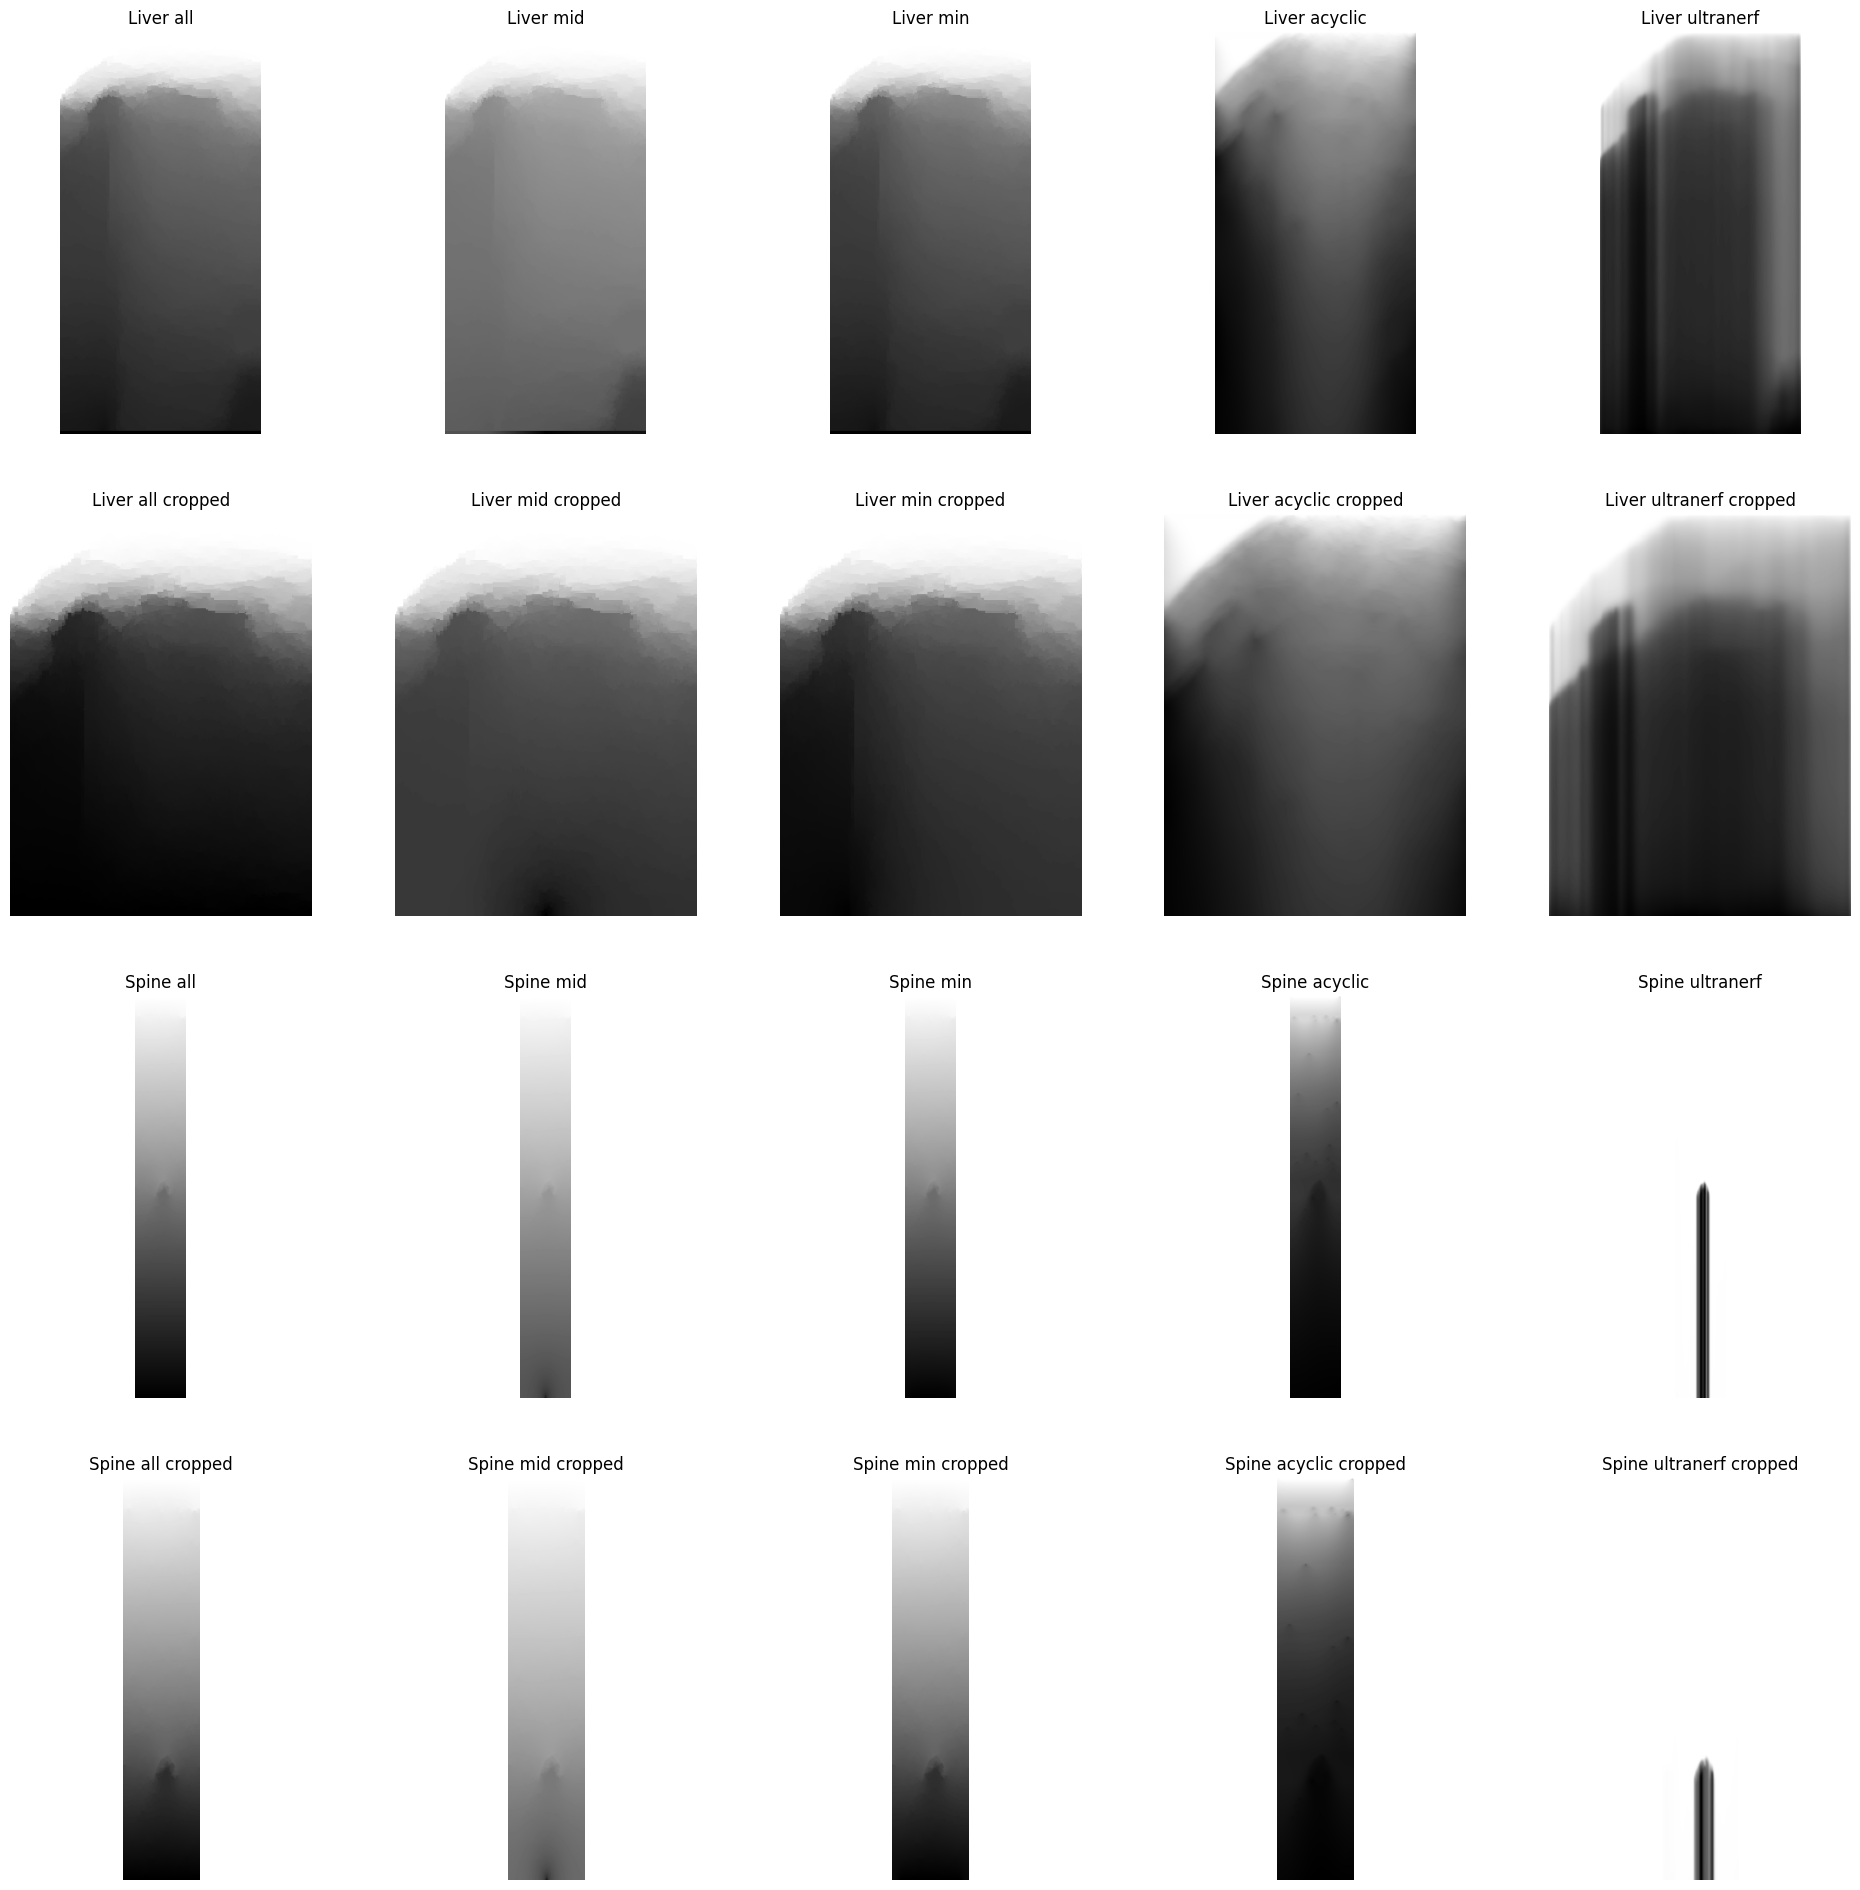

In [26]:
# Plot one slice of each

plt.figure(figsize=(24, 24))

for i, key in enumerate(liver):
    plt.subplot(4, len(liver), i+1)
    plt.imshow(liver[key][0], cmap="gray")
    plt.title(f"Liver {key}")
    plt.axis("off")

    plt.subplot(4, len(liver), i+1+len(liver))
    plt.imshow(liver_cropped[key][0], cmap="gray")
    plt.title(f"Liver {key} cropped")
    plt.axis("off")

    plt.subplot(4, len(liver), i+1+2*len(liver))
    plt.imshow(spine[key][0], cmap="gray")
    plt.title(f"Spine {key}")
    plt.axis("off")

    plt.subplot(4, len(liver), i+1+3*len(liver))
    plt.imshow(spine_cropped[key][0], cmap="gray")
    plt.title(f"Spine {key} cropped")
    plt.axis("off")

plt.show()

In [5]:
# min and max values of each confidence map

for key in liver:
    print(f"Liver {key}: min={liver[key].min()}, max={liver[key].max()}")
    print(f"Liver {key} cropped: min={liver_cropped[key].min()}, max={liver_cropped[key].max()}")

for key in spine:
    print(f"Spine {key}: min={spine[key].min()}, max={spine[key].max()}")
    print(f"Spine {key} cropped: min={spine_cropped[key].min()}, max={spine_cropped[key].max()}")


Liver all: min=0.0, max=1.0
Liver all cropped: min=0.0, max=1.0
Liver mid: min=0.0, max=1.0
Liver mid cropped: min=0.0, max=1.0
Liver min: min=0.0, max=1.0
Liver min cropped: min=0.0, max=1.0
Liver acyclic: min=0.04751678931070817, max=1.0057580221462683
Liver acyclic cropped: min=0.02627799457622392, max=1.0044816907110563
Liver ultranerf: min=0.007624316494911909, max=1.0
Liver ultranerf cropped: min=0.005780166480690241, max=1.0
Spine all: min=0.0, max=1.0
Spine all cropped: min=0.0, max=1.0
Spine mid: min=0.0, max=1.0
Spine mid cropped: min=0.0, max=1.0
Spine min: min=0.0, max=1.0
Spine min cropped: min=0.0, max=1.0
Spine acyclic: min=0.1254233395352804, max=1.0001693380390695
Spine acyclic cropped: min=0.08918752598131718, max=1.000117681363717
Spine ultranerf: min=0.0, max=1.0
Spine ultranerf cropped: min=7.129297330266127e-08, max=1.0


In [25]:
# Compare the bottom-most rows of cropped confidence maps with the corresponding rows of the full confidence maps

# First define the metrics

def mse(a, b): # Lower is better
    return np.mean((a - b)**2)

def psnr(a, b): # Higher is better
    return 10 * np.log10(1 / mse(a, b))

# For bottom [1, 3, 5] rows calculate the metrics

# Liver

liver_metrics = {
    "mse": {},
    "psnr": {},
}

for key in liver:

    h = liver_cropped[key].shape[1]

    for i in [1, 3, 5]:

        rows_full = liver[key][:, h-i:h, :]
        rows_cropped = liver_cropped[key][:, h-i:h, :]

        mses = []
        psnrs = []

        for j in range(rows_full.shape[0]):
            mses.append(mse(rows_full[j], rows_cropped[j]))
            psnrs.append(psnr(rows_full[j], rows_cropped[j]))

        liver_metrics["mse"][f"{key}_{i}"] = (np.mean(mses), np.std(mses))
        liver_metrics["psnr"][f"{key}_{i}"] = (np.mean(psnrs), np.std(psnrs))

# Spine

spine_metrics = {
    "mse": {},
    "psnr": {},
}

for key in spine:

    h = spine_cropped[key].shape[1]

    for i in [1, 3, 5]:

        rows_full = spine[key][:, h-i:h, :]
        rows_cropped = spine_cropped[key][:, h-i:h, :]

        mses = []
        psnrs = []

        for j in range(rows_full.shape[0]):
            mses.append(mse(rows_full[j], rows_cropped[j]))
            psnrs.append(psnr(rows_full[j], rows_cropped[j]))

        spine_metrics["mse"][f"{key}_{i}"] = (np.mean(mses), np.std(mses))
        spine_metrics["psnr"][f"{key}_{i}"] = (np.mean(psnrs), np.std(psnrs))

# Make the metrics into a LaTeX table

def create_latex_table(metrics, title):
    header = " & ".join(["Key", "MSE", "PSNR"]) + " \\\\\\hline"

    body = ""
    for row_count in [1, 3, 5]:
        # Extract relevant keys for the current row count
        relevant_mse_keys = [key for key in metrics["mse"] if key.endswith(f"_{row_count}")]
        relevant_psnr_keys = [key for key in metrics["psnr"] if key.endswith(f"_{row_count}")]

        # Ensure there are keys to process
        if relevant_mse_keys and relevant_psnr_keys:
            best_mse = min([metrics["mse"][key][0] for key in relevant_mse_keys])
            best_psnr = max([metrics["psnr"][key][0] for key in relevant_psnr_keys])

            for key in sorted(relevant_mse_keys):
                mse_val, mse_std = metrics["mse"][key]
                psnr_val, psnr_std = metrics["psnr"][key]

                mse_str = f"{mse_val:.4f} $\\pm$ {mse_std:.4f}"
                psnr_str = f"{psnr_val:.4f} $\\pm$ {psnr_std:.4f}"

                if mse_val == best_mse:
                    mse_str = f"\\textbf{{{mse_str}}}"
                if psnr_val == best_psnr:
                    psnr_str = f"\\textbf{{{psnr_str}}}"

                body += f"{key} & {mse_str} & {psnr_str} \\\\\n"
        else:
            # Handle case with no relevant keys
            body += f"No data for row count {row_count} \\\\\n"

    table = f"""
\\begin{{table}}[H]
\\centering
\\caption{{Metrics for {title}}}
\\begin{{tabular}}{{|l|c|c|}}
\\hline
{header}
{body}
\\hline
\\end{{tabular}}
\\end{{table}}
"""

    return table

# Generate LaTeX tables for liver and spine metrics
latex_table_liver = create_latex_table(liver_metrics, "Liver")
latex_table_spine = create_latex_table(spine_metrics, "Spine")

print(latex_table_liver)
print(latex_table_spine)




\begin{table}[H]
\centering
\caption{Metrics for Liver}
\begin{tabular}{|l|c|c|}
\hline
Key & MSE & PSNR \\\hline
acyclic_1 & \textbf{0.0057 $\pm$ 0.0005} & \textbf{22.4529 $\pm$ 0.3973} \\
all_1 & 0.6024 $\pm$ 0.1847 & 2.8297 $\pm$ 3.1100 \\
mid_1 & 0.1088 $\pm$ 0.0646 & 10.6090 $\pm$ 3.2058 \\
min_1 & 0.0226 $\pm$ 0.0202 & 17.7574 $\pm$ 3.2444 \\
ultranerf_1 & 0.1367 $\pm$ 0.0422 & 9.0894 $\pm$ 2.4072 \\
acyclic_3 & \textbf{0.0057 $\pm$ 0.0005} & \textbf{22.4283 $\pm$ 0.3948} \\
all_3 & 0.5987 $\pm$ 0.1833 & 2.8523 $\pm$ 3.0972 \\
mid_3 & 0.1062 $\pm$ 0.0667 & 10.9049 $\pm$ 3.5716 \\
min_3 & 0.0208 $\pm$ 0.0202 & 18.4788 $\pm$ 3.8454 \\
ultranerf_3 & 0.1236 $\pm$ 0.0379 & 9.5140 $\pm$ 2.3678 \\
acyclic_5 & \textbf{0.0058 $\pm$ 0.0005} & \textbf{22.4022 $\pm$ 0.3937} \\
all_5 & 0.5941 $\pm$ 0.1816 & 2.8832 $\pm$ 3.0865 \\
mid_5 & 0.1038 $\pm$ 0.0676 & 11.1074 $\pm$ 3.7270 \\
min_5 & 0.0203 $\pm$ 0.0204 & 18.8393 $\pm$ 4.2200 \\
ultranerf_5 & 0.1139 $\pm$ 0.0346 & 9.8582 $\pm$ 2.3363 

Liver Label Shape: (200, 512, 256)


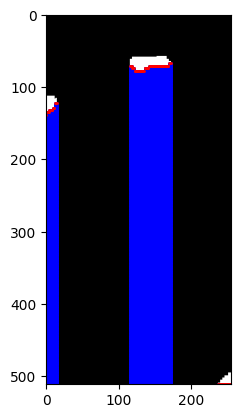

In [17]:
# Load Liver Labels

label_path = "data/liver_labels/l1.nii"
liver_label = nib.load(label_path).get_fdata()[..., 0, :]

# Correct the orientation of the images
liver_label = np.transpose(liver_label, (2, 0, 1))
liver_label = np.transpose(liver_label, (0, 2, 1))

# Crop the extra pixels
liver_label = liver_label[:, :-4, :]
print(f"Liver Label Shape: {liver_label.shape}")

liver_bone_mask = liver_label == 13

# Coordinates
liver_bone_coords = np.where(liver_bone_mask)

bone_bottoms = []
shadow_mask = np.zeros(liver_bone_mask.shape, dtype=bool)

for i in range(liver_bone_mask.shape[0]):
    for j in range(liver_bone_mask.shape[2]):
        line = liver_bone_mask[i, :, j]
        if np.any(line):
            bottom = np.where(line)[0][-1]
            bone_bottoms.append((i, bottom, j))
            shadow_mask[i, bottom:, j] = 1

bone_bottoms = np.array(bone_bottoms)


# Plot the bone bottoms on labels
import matplotlib.pyplot as plt

slice = 54
plt.imshow(liver_bone_mask[slice, :, :], cmap="gray")
plt.scatter(np.where(shadow_mask[slice])[1], np.where(shadow_mask[slice])[0], c="b", s=1)
plt.scatter(bone_bottoms[ bone_bottoms[:, 0] == slice, 2], bone_bottoms[ bone_bottoms[:, 0] == slice, 1], c="r", s=1)

plt.show()

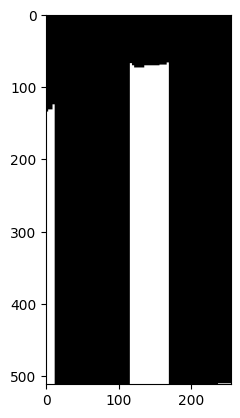

In [18]:
# Select the relevant slices from shadow_mask

shadow_mask_selected = shadow_mask[idxs_liver]

plt.imshow(shadow_mask_selected[0], cmap="gray")
plt.show()


In [21]:
# Calculate mean and std of values of confidence maps in the shadow

# Liver

# Karamalis all
liver_all_shadow = liver_all[shadow_mask_selected]
liver_all_shadow_mean = liver_all_shadow.mean()
liver_all_shadow_std = liver_all_shadow.std()
print(f"Karamalis all: {liver_all_shadow_mean:.4f} +- {liver_all_shadow_std:.4f}\n")

# Karamalis mid
liver_mid_shadow = liver_mid[shadow_mask_selected]
liver_mid_shadow_mean = liver_mid_shadow.mean()
liver_mid_shadow_std = liver_mid_shadow.std()
print(f"Karamalis mid: {liver_mid_shadow_mean:.4f} +- {liver_mid_shadow_std:.4f}\n")

# Karamalis min
liver_min_shadow = liver_min[shadow_mask_selected]
liver_min_shadow_mean = liver_min_shadow.mean()
liver_min_shadow_std = liver_min_shadow.std()
print(f"Karamalis min: {liver_min_shadow_mean:.4f} +- {liver_min_shadow_std:.4f}\n")

# Acyclic
liver_acyclic_shadow = liver_acyclic[shadow_mask_selected]
liver_acyclic_shadow_mean = liver_acyclic_shadow.mean()
liver_acyclic_shadow_std = liver_acyclic_shadow.std()
print(f"Acyclic: {liver_acyclic_shadow_mean:.4f} +- {liver_acyclic_shadow_std:.4f}\n")

# ultraNeRF
liver_ultranerf_shadow = liver_ultranerf[shadow_mask_selected]
liver_ultranerf_shadow_mean = liver_ultranerf_shadow.mean()
liver_ultranerf_shadow_std = liver_ultranerf_shadow.std()
print(f"ultraNeRF: {liver_ultranerf_shadow_mean:.4f} +- {liver_ultranerf_shadow_std:.4f}\n")


Karamalis all: 0.7854 +- 0.1549

Karamalis mid: 0.8140 +- 0.1335

Karamalis min: 0.7866 +- 0.1535

Acyclic: 0.2306 +- 0.1508

ultraNeRF: 0.2246 +- 0.0949

